# Get network stats

In [295]:
import pickle
import pandas as pd
import networkx as nx
import pickle
import numpy as np
import powerlaw
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from matplotlib_venn import venn3
import igraph as ig
import leidenalg
from itertools import combinations
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm

In [300]:
def graph_stats(G):
    """Returns various statistics of a given graph G."""
    stats = {}
    stats['num_nodes'] = G.number_of_nodes()
    stats['num_edges'] = G.number_of_edges()
    stats['density'] = nx.density(G)
    
    degrees = [d for n, d in G.degree()]
    stats['mean_degree'] = np.mean(degrees)
    stats['std_degree'] = np.std(degrees)
    stats['avg_clustering_coeff'] = nx.average_clustering(G)
    
    stats['degree_assortativity'] = nx.degree_assortativity_coefficient(G)
    
    # Giant Connected Component (GCC)
    if nx.is_directed(G) == False:
        largest_cc = max(nx.connected_components(G), key=len)
        GCC = G.subgraph(largest_cc)
        stats['GCC_size'] = len(GCC)
    
    # Power-law fitting
    try:
        fit = powerlaw.Fit(degrees)
        stats['power_law_alpha'] = fit.alpha  
        stats['power_law_xmin'] = fit.xmin  
        stats['ks_test_statistic'] = fit.D 

        distribution_list = ['lognormal', 'exponential', 'truncated_power_law']
        comparison_results = {}
        
        for dist in distribution_list:
            R, p = fit.distribution_compare('power_law', dist)
            comparison_results[dist] = (R, p)
        
        best_fit = min(comparison_results.items(), key=lambda x: (x[1][0], x[1][1]))
        best_dist, (best_R, best_p) = best_fit
        
        stats['best_powerlaw_comparison'] = f"power law vs {best_dist}: R = {best_R:.3f}, p = {best_p:.3f}"
    
    except Exception as e:
        stats['power_law_test_error'] = str(e)
    
    return stats

### Likes network

In [297]:
with open("../shared-folder-gald/data/likes_network.pkl", "rb") as f:
    likes = pickle.load(f)

In [301]:
likes_stats = graph_stats(likes)

Calculating best minimal value for power law fit


Assuming nested distributions


In [302]:
for key, val in likes_stats.items():
    print(key,'-', val)

num_nodes - 496
num_edges - 9921
density - 0.08081622678396871
mean_degree - 40.00403225806452
std_degree - 22.83716869630462
avg_clustering_coeff - 0.975622484061089
degree_assortativity - 0.5769104907851405
GCC_size - 449
power_law_alpha - 3.9807634397976934
power_law_xmin - 39.0
ks_test_statistic - 0.17662559817547108
best_powerlaw_comparison - power law vs exponential: R = -7.855, p = 0.031


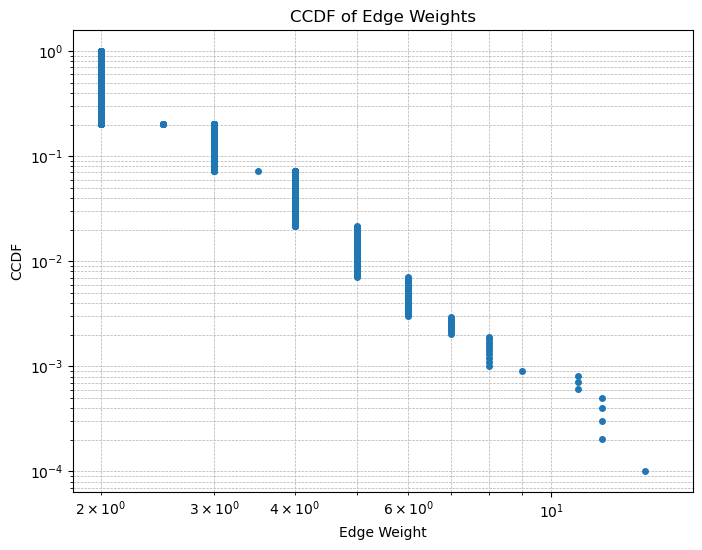

In [ ]:
weights = [d['weight'] for _, _, d in likes.edges(data=True)]

weights_sorted = np.sort(weights)

ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


### Hashtag coocurence

In [167]:
with open('../shared-folder-gald/data/unipartite_og.pkl', 'rb') as f:
    HC = pickle.load(f)

In [168]:
HC_stats = graph_stats(HC)

KeyboardInterrupt: 

In [ ]:
for key, val in HC_stats.items():
    print(key,'-', val)

num_nodes - 673697
num_edges - 35570526
density - 0.00015674427983923908
mean_degree - 105.597994350576
std_degree - 713.0254975203421
diameter - None
degree_assortativity - -0.05238549368106408
GCC_size - 671514
power_law_alpha - 2.140394228821985
power_law_xmin - 154.0
ks_test_statistic - 0.007946039245517178
best_powerlaw_comparison - power law vs truncated_power_law: R = -134.901, p = 0.000


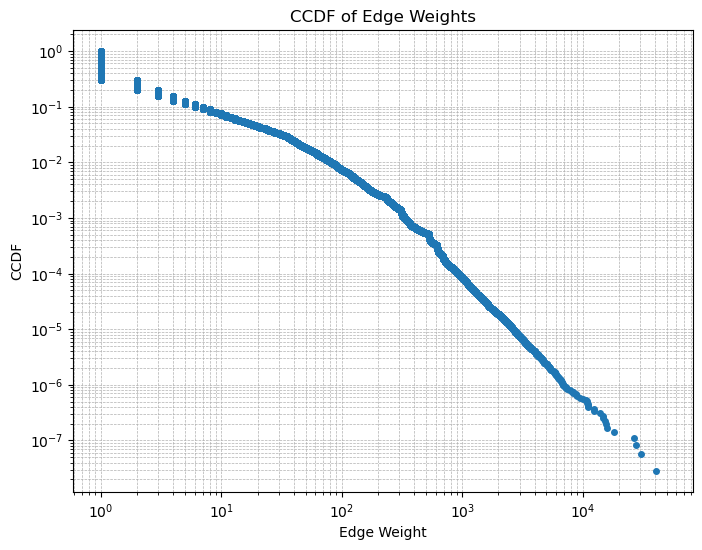

In [ ]:
weights = [d['weight'] for _, _, d in HC.edges(data=True)]

weights_sorted = np.sort(weights)

ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


### Follow network

In [163]:
with open('../shared-folder-gald/data/follow_graph.pkl', 'rb') as f:
    FG = pickle.load(f)

In [12]:
FG_stats = graph_stats(FG)

Calculating best minimal value for power law fit


Assuming nested distributions


In [13]:
for key, val in FG_stats.items():
    print(key,'-', val)

num_nodes - 62876
num_edges - 10786891
density - 0.002728559238120485
mean_degree - 343.116324193651
std_degree - 913.8445860384836
global_clustering_coeff - 0.12280097840676181
degree_assortativity - -0.15184128957300969
power_law_alpha - 2.551824576423133
power_law_xmin - 1152.0
ks_test_statistic - 0.028032308521774962
best_powerlaw_comparison - power law vs truncated_power_law: R = -32.243, p = 0.000


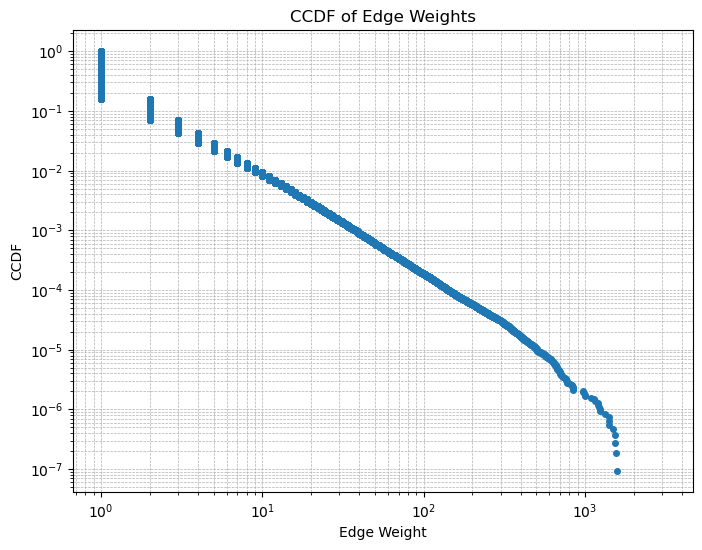

In [ ]:
weights = [d['weight'] for _, _, d in FG.edges(data=True)]

weights_sorted = np.sort(weights)

ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

### Duet/Stitch network

In [303]:
with open('../shared-folder-gald/data/duet_stitch_graph.pkl', 'rb') as f:
    ds = pickle.load(f)

In [304]:
ds_stats = graph_stats(ds)

Calculating best minimal value for power law fit


Assuming nested distributions


In [305]:
for key, val in ds_stats.items():
    print(key,'-', val)

num_nodes - 4209
num_edges - 55093
density - 0.0031105827906342284
mean_degree - 26.17866476597767
std_degree - 55.150688072688126
avg_clustering_coeff - 0.0965199428888075
degree_assortativity - -0.16337379922791187
power_law_alpha - 2.6651836732904606
power_law_xmin - 100.0
ks_test_statistic - 0.04588388191193715
best_powerlaw_comparison - power law vs truncated_power_law: R = -0.834, p = 0.196


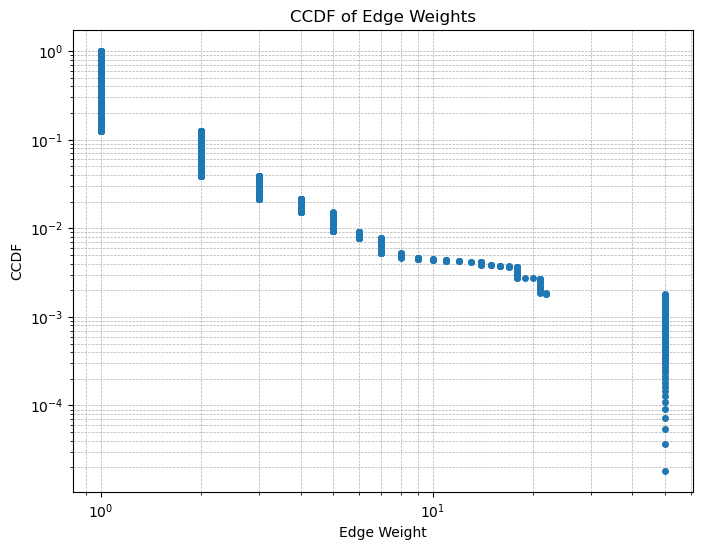

In [ ]:
weights = [d['weight'] for _, _, d in ds.edges(data=True)]

weights_sorted = np.sort(weights)

ccdf = 1.0 - np.arange(1, len(weights_sorted) + 1) / len(weights_sorted)

plt.figure(figsize=(8, 6))
plt.plot(weights_sorted, ccdf, marker='o', linestyle='none', markersize=4)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Edge Weight')
plt.ylabel('CCDF')
plt.title('CCDF of Edge Weights')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

Filtering:
Disparity filter - understand the parameters


Analysis:
Overlap between networks np. highest weights
Map on semantic space and their differences

# Structural analysis

Networks' names:

duet/stitch - ds

follow - follows

haashtag coocurrence - hc

likes - likes

## Centralities

In [116]:
with open('ready_networks/follow_filtered.pkl', 'rb') as f:
    follows = pickle.load(f)

In [117]:
with open('ready_networks/cooc_filtered.pkl', 'rb') as f:
    hc = pickle.load(f)

In [118]:
with open('ready_networks/ds_network.pkl', 'rb') as f:
    ds = pickle.load(f)

In [119]:
with open('ready_networks/likes_network.pkl', 'rb') as f:
    likes = pickle.load(f)

In [10]:
# degree centrality
ds_dc = nx.degree_centrality(ds)
follows_dc = nx.degree_centrality(follows)
hc_dc = nx.degree_centrality(hc)
likes_dc = nx.degree_centrality(likes)

# closeness centrality
ds_cc = nx.closeness_centrality(ds)
follows_cc = nx.closeness_centrality(follows)
hc_cc = nx.closeness_centrality(hc)
likes_cc = nx.closeness_centrality(likes)

# betweenness centrality
ds_bc = nx.betweenness_centrality(ds)
follows_bc = nx.betweenness_centrality(follows)
hc_bc = nx.betweenness_centrality(hc)
likes_bc = nx.betweenness_centrality(likes)


In [ ]:
# save all centralities 
centrality_data = {
    "ds_dc": ds_dc,
    "follows_dc": follows_dc,
    "hc_dc": hc_dc,
    "likes_dc": likes_dc,

    "ds_cc": ds_cc,
    "follows_cc": follows_cc,
    "hc_cc": hc_cc,
    "likes_cc": likes_cc,

    "ds_bc": ds_bc,
    "follows_bc": follows_bc,
    "hc_bc": hc_bc,
    "likes_bc": likes_bc
}

with open("analysis_output/all_centralities.pkl", "wb") as f:
    pickle.dump(centrality_data, f)

In [ ]:
# load all centralities
with open("analysis_output/all_centralities.pkl", "rb") as f:
    centrality_data = pickle.load(f)

ds_dc = centrality_data["ds_dc"]
follows_dc = centrality_data["follows_dc"]
hc_dc = centrality_data["hc_dc"]
likes_dc = centrality_data["likes_dc"]

ds_cc = centrality_data["ds_cc"]
follows_cc = centrality_data["follows_cc"]
hc_cc = centrality_data["hc_cc"]
likes_cc = centrality_data["likes_cc"]

ds_bc = centrality_data["ds_bc"]
follows_bc = centrality_data["follows_bc"]
hc_bc = centrality_data["hc_bc"]
likes_bc = centrality_data["likes_bc"]


In [71]:
def get_top_k(centrality_dict, k=50):
    """Return list of top-k hashtags sorted by centrality value."""
    return [tag for tag, val in sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)[:k]]

top_50_degree = {
    'Hashtag Co-occurrence': get_top_k(hc_dc),
    'Likes': get_top_k(likes_dc),
    'Follows': get_top_k(follows_dc),
    'Duet/Stitch': get_top_k(ds_dc)
}
top_50_closeness = {
    'Hashtag Co-occurrence': get_top_k(hc_cc),
    'Likes': get_top_k(likes_cc),
    'Follows': get_top_k(follows_cc),
    'Duet/Stitch': get_top_k(ds_cc)
}
top_50_betweenness = {
    'Hashtag Co-occurrence': get_top_k(hc_bc),
    'Likes': get_top_k(likes_bc),
    'Follows': get_top_k(follows_bc),
    'Duet/Stitch': get_top_k(ds_bc)
}

df_degree = pd.DataFrame(top_50_degree)
df_closeness = pd.DataFrame(top_50_closeness)
df_betweenness = pd.DataFrame(top_50_betweenness)

In [72]:
degree_set = set(sum(top_50_degree.values(), []))
closeness_set = set(sum(top_50_closeness.values(), []))
betweenness_set = set(sum(top_50_betweenness.values(), []))


In [73]:
central_in_all = degree_set & closeness_set & betweenness_set
print("Hashtags appearing in all three centrality top-50 lists:")
print(central_in_all)


Hashtags appearing in all three centrality top-50 lists:
{'learnontiktok', 'ecotok', 'nature', 'trump', 'frenchbulldoggs', 'climatechange', 'style', 'beautiful', 'garden', 'ocean', 'yummy', 'family', 'explore', 'uk', 'frenchbulldogforsale', 'biden', 'climatejustice', 'sustainability', 'republican', 'plasticpollution', 'plantbased', 'happy', 'travel', 'cooking', 'climateaction', 'education', 'art', 'politics', 'summer', 'climatecrisis', 'motivation', 'zerowaste', 'greenscreen', 'meme', 'life', 'selfcare', 'sustainablefashion', 'health', 'socialjustice', 'cute', 'ecofriendly', 'frenchbulldogfluffy', 'animals', 'comedy', 'sustainableliving', 'sustainable', 'gardening', 'weather', 'democrat', 'wildlife', 'mentalhealth', 'music', 'conservation', 'plasticfree', 'lifestyle', 'usa', 'vegan', 'fun', 'climate', 'diy', 'food', 'slowfashion', 'smallbusiness', 'foodie', 'fashion', 'frenchbulldogfamily'}


In [75]:
hashtag_to_centralities = defaultdict(set)

for tag in degree_set:
    hashtag_to_centralities[tag].add("degree")
for tag in closeness_set:
    hashtag_to_centralities[tag].add("closeness")
for tag in betweenness_set:
    hashtag_to_centralities[tag].add("betweenness")

unique_to_degree = []
unique_to_closeness = []
unique_to_betweenness = []

for tag, centralities in hashtag_to_centralities.items():
    if len(centralities) == 1:
        cent = list(centralities)[0]
        if cent == "degree":
            unique_to_degree.append(tag)
        elif cent == "closeness":
            unique_to_closeness.append(tag)
        elif cent == "betweenness":
            unique_to_betweenness.append(tag)

print("Hashtags uniquely central by centrality type:\n")

print("Degree Centrality (unique):")
print(unique_to_degree, "\n")

print("Closeness Centrality (unique):")
print(unique_to_closeness, "\n")

print("Betweenness Centrality (unique):")
print(unique_to_betweenness)


Hashtags uniquely central by centrality type:

Degree Centrality (unique):
['gma', 'drinks', 'moment', 'icecoffee', 'easydressing', 'royals', 'oscars', 'redcarpet', 'mochacoffee', 'easylunch', 'nativeamerican', 'info', 'dancingongma', 'lemonade', 'drinkideas', 'mocha', 'easydressingrecipe', 'icecoffees', 'mochas', 'fastdressing', 'drinkspindrift', 'dancingwiththestars', 'shangela', 'lemonades', 'ice', 'easylunchideas', 'lemongrass', 'maga', 'joebiden', 'growyourownfood', 'flavoryourworld', 'inspiration', 'easylunches', 'moments', 'democrats', 'lemonade🍋', 'dwts', 'lemon', 'icedcoffee', 'icedcoffees', 'flavoryourwater', 'bachelornation', 'drinksupercoffee', 'lemonicetea', 'icedtea'] 

Closeness Centrality (unique):
['severeweather', 'storm', 'wga', 'alexwilson', 'sustainableswaps', 'upcycle', 'wildfood', 'celebrity', 'eco', 'makeuphacks', 'sustainabledesign', 'lunchboxes?', 'reusable', 'entertainment', 'easyrecipe', 'environment', 'compost', 'cop27', 'foodwastetip', 'environmentalist', 

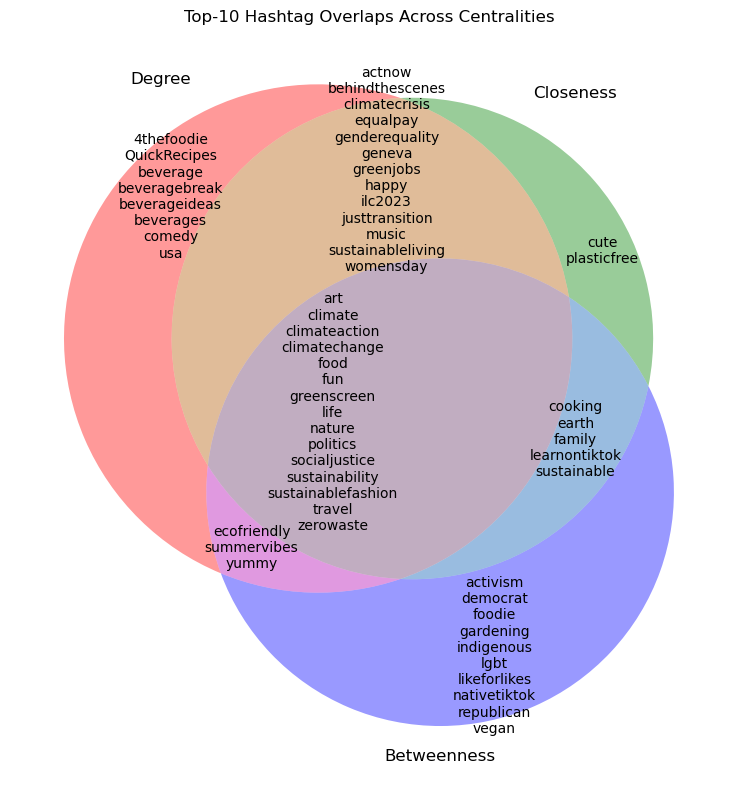

In [93]:
top_10_degree = {
    'Hashtag Co-occurrence': get_top_k(hc_dc, k=10),
    'Likes': get_top_k(likes_dc, k=10),
    'Follows': get_top_k(follows_dc, k=10),
    'Duet/Stitch': get_top_k(ds_dc, k=10)
}
top_10_closeness = {
    'Hashtag Co-occurrence': get_top_k(hc_cc, k=10),
    'Likes': get_top_k(likes_cc, k=10),
    'Follows': get_top_k(follows_cc, k=10),
    'Duet/Stitch': get_top_k(ds_cc, k=10)
}
top_10_betweenness = {
    'Hashtag Co-occurrence': get_top_k(hc_bc, k=10),
    'Likes': get_top_k(likes_bc, k=10),
    'Follows': get_top_k(follows_bc, k=10),
    'Duet/Stitch': get_top_k(ds_bc, k=10)
}

degree_top10 = set(sum(top_10_degree.values(), []))
closeness_top10 = set(sum(top_10_closeness.values(), []))
betweenness_top10 = set(sum(top_10_betweenness.values(), []))

plt.figure(figsize=(10, 8))
v = venn3(
    [degree_top10, closeness_top10, betweenness_top10],
    set_labels=('Degree', 'Closeness', 'Betweenness')
)

def get_subset_labels(d, c, b):
    return {
        '100': d - c - b,
        '010': c - d - b,
        '001': b - d - c,
        '110': d & c - b,
        '101': d & b - c,
        '011': c & b - d,
        '111': d & c & b
    }

labels = get_subset_labels(degree_top10, closeness_top10, betweenness_top10)

# make the text not overlap
label_positions = {
    '100': (-0.4, 0.35),
    '010': (0.4, 0.25),
    '001': (0.2, -0.5),
    '110': (0.0, 0.4),
    '101': (-0.25, -0.3),
    '011': (0.35, -0.1),
    '111': (-0.1, -0.05)
}

for subset_id, hashtags in labels.items():
    label = v.get_label_by_id(subset_id)
    if label and hashtags:
        label.set_text("\n".join(sorted(hashtags)))
        x_pos, y_pos = label_positions[subset_id]
        label.set_position((x_pos, y_pos))

plt.title("Top-10 Hashtag Overlaps Across Centralities")
plt.tight_layout()
plt.show()

In [94]:
plt.savefig("analysis_output/venn_diagram_top10_hashtags.png", dpi=300)

<Figure size 640x480 with 0 Axes>

In [95]:
hc_top50 = set(top_50_degree['Hashtag Co-occurrence']) | set(top_50_closeness['Hashtag Co-occurrence']) | set(top_50_betweenness['Hashtag Co-occurrence'])
likes_top50 = set(top_50_degree['Likes']) | set(top_50_closeness['Likes']) | set(top_50_betweenness['Likes'])
follows_top50 = set(top_50_degree['Follows']) | set(top_50_closeness['Follows']) | set(top_50_betweenness['Follows'])
ds_top50 = set(top_50_degree['Duet/Stitch']) | set(top_50_closeness['Duet/Stitch']) | set(top_50_betweenness['Duet/Stitch'])

all_sets = {
    'Hashtag Co-occurrence': hc_top50,
    'Likes': likes_top50,
    'Follows': follows_top50,
    'Duet/Stitch': ds_top50
}

all_hashtags = hc_top50 | likes_top50 | follows_top50 | ds_top50

hashtag_counts = defaultdict(int)
for net_set in all_sets.values():
    for tag in net_set:
        hashtag_counts[tag] += 1

unique_to_one_network = {tag for tag, count in hashtag_counts.items() if count == 1}

for network_name, network_set in all_sets.items():
    print(f"\nHashtags unique to {network_name}:")

    for centrality_name, centrality_dict in zip(['Degree', 'Closeness', 'Betweenness'], 
                                               [top_50_degree, top_50_closeness, top_50_betweenness]):
        
        centrality_set = set(centrality_dict[network_name])
        
        if centrality_name == 'Degree':
            unique_in_centrality = centrality_set - (set(top_50_closeness[network_name]) | set(top_50_betweenness[network_name]))
        elif centrality_name == 'Closeness':
            unique_in_centrality = centrality_set - (set(top_50_degree[network_name]) | set(top_50_betweenness[network_name]))
        else:  # betweenness
            unique_in_centrality = centrality_set - (set(top_50_degree[network_name]) | set(top_50_closeness[network_name]))
        
        if unique_in_centrality:
            print(f"{centrality_name} Centrality: {sorted(unique_in_centrality)}")


Hashtags unique to Hashtag Co-occurrence:
Degree Centrality: ['inspiration', 'uk']
Closeness Centrality: ['christmas', 'home', 'nyc', 'photooftheday', 'work']
Betweenness Centrality: ['garden', 'homedecor', 'indigenous', 'momsoftiktok', 'ocean', 'republican', 'sustainableliving', 'vintage']

Hashtags unique to Likes:
Degree Centrality: ['drinkideas', 'drinks', 'drinkspindrift', 'drinksupercoffee', 'easydressing', 'easydressingrecipe', 'easylunch', 'easylunches', 'easylunchideas', 'fastdressing', 'flavoryourwater', 'flavoryourworld', 'ice', 'icecoffee', 'icecoffees', 'icedcoffee', 'icedcoffees', 'icedtea', 'lemon', 'lemonade', 'lemonades', 'lemonade🍋', 'lemongrass', 'lemonicetea', 'mocha', 'mochacoffee', 'mochas', 'moment', 'moments']
Closeness Centrality: ['allen', 'animalfacts', 'animals', 'antarctica', 'astronaut', 'australia', 'axiom2', 'bees', 'butterflies', 'compost', 'cool', 'eco', 'ecodesign', 'ecohome', 'ecoswaps', 'ecotravel', 'environmentalist', 'foodwaste', 'foodwastepreven

## Community detection

In [269]:
with open('ready_networks/follow_filtered.pkl', 'rb') as f:
    follows = pickle.load(f)
with open('ready_networks/cooc_filtered.pkl', 'rb') as f:
    hc = pickle.load(f)
with open('ready_networks/ds_network.pkl', 'rb') as f:
    ds = pickle.load(f)
with open('ready_networks/likes_network.pkl', 'rb') as f:
    likes = pickle.load(f)

In [270]:
def nx_to_igraph(G):
    G = G.copy()
    is_directed = nx.is_directed(G)

    ig_graph = ig.Graph(directed=is_directed)
    ig_graph.add_vertices(list(G.nodes))
    ig_graph.add_edges(list(G.edges))

    if nx.get_edge_attributes(G, 'weight'):
        ig_graph.es['weight'] = [G[u][v].get('weight', 1.0) for u, v in G.edges]

    return ig_graph


### Likes

In [271]:
likes_igraph = nx_to_igraph(likes)
likes_partition = leidenalg.find_partition(likes_igraph, leidenalg.ModularityVertexPartition)

In [ ]:
likes_partition_dict = {likes_igraph.vs[idx]['name']: comm_id for idx, comm_id in enumerate(likes_partition.membership)}

likes_comm_sizes = Counter(likes_partition_dict.values())
print(f"Number of communities: {len(likes_comm_sizes)}")
print("Community sizes:", likes_comm_sizes)

Number of communities: 14
Community sizes: Counter({0: 85, 1: 78, 2: 61, 3: 52, 4: 44, 5: 38, 6: 30, 7: 29, 8: 18, 9: 18, 10: 12, 11: 7, 12: 4, 13: 4})


In [289]:
likes_comm_hashtags = defaultdict(list)
for node, comm_id in likes_partition_dict.items():
    likes_comm_hashtags[comm_id].append(node)

likes_sorted_comms = sorted(likes_comm_hashtags.items(), key=lambda x: len(x[1]), reverse=True)

for comm_id, members in likes_sorted_comms[:10]:
    # Sort community members by degree in descending order
    sorted_members = sorted(members, key=lambda node: likes.degree[node], reverse=True)
    
    print(f"\nCommunity {comm_id} (size={len(members)}):")
    print(", ".join(sorted_members[:50]))



Community 0 (size=85):
climatechange, climate, climateaction, earth, nature, recycle, allen, animalfacts, animals, antarctica, astronaut, australia, axiom2, bees, butterflies, cool, cop28, ecofriendly, flies, fossilfuels, funfacts, glass, globalwarming, honey, horse, horseracing, insects, internationalspacestation, iss, kentuckyderby, moon, nowthis, oil, photography, pov, rayyanahbarnawi, saudi, seals, shooting, space, texas, themoreyouknow, timelapse, uae, upcycle, worldbeeday, climatecrisis, ecotok, activist, actonclimate

Community 1 (size=78):
summervibes, yummy, 4thefoodie, QuickRecipes, beverage, beveragebreak, beverageideas, beverages, break, breaks, coffee, coffees, cottagecheese, cottagecheeserecipes, dance, dancing, dancingfruit, drink, drinkidea, drinkideas, drinks, drinkspindrift, drinksupercoffee, easydressing, easydressingrecipe, easylunch, easylunches, easylunchideas, fastdressing, flavoryourwater, flavoryourworld, ice, icecoffee, icecoffees, icedcoffee, icedcoffees, ic

### Hashtag coocurrence

In [272]:
hc_igraph = nx_to_igraph(hc)
hc_partition = leidenalg.find_partition(hc_igraph, leidenalg.ModularityVertexPartition)

In [ ]:
hc_partition_dict = {hc_igraph.vs[idx]['name']: comm_id for idx, comm_id in enumerate(hc_partition.membership)}

hc_comm_sizes = Counter(hc_partition_dict.values())
print(f"Number of communities: {len(hc_comm_sizes)}")
print("Community sizes:", hc_comm_sizes)

Number of communities: 577
Community sizes: Counter({0: 5390, 1: 3160, 2: 2941, 3: 2878, 4: 2625, 5: 2258, 6: 1616, 7: 1531, 8: 1391, 9: 1309, 10: 1227, 11: 1200, 12: 1143, 13: 1137, 14: 895, 15: 870, 16: 748, 17: 720, 18: 654, 19: 607, 20: 575, 21: 556, 22: 541, 23: 497, 24: 361, 25: 342, 26: 292, 27: 236, 28: 205, 29: 83, 30: 80, 31: 80, 32: 62, 33: 57, 34: 25, 35: 24, 36: 23, 37: 21, 39: 20, 38: 20, 40: 17, 41: 17, 42: 12, 43: 12, 45: 11, 46: 11, 44: 11, 49: 10, 50: 10, 48: 10, 47: 10, 51: 9, 52: 9, 56: 8, 54: 8, 59: 8, 55: 8, 57: 8, 53: 8, 58: 8, 60: 8, 61: 7, 62: 7, 63: 7, 64: 7, 73: 6, 74: 6, 72: 6, 65: 6, 71: 6, 66: 6, 67: 6, 75: 6, 69: 6, 70: 6, 68: 6, 76: 5, 85: 5, 86: 5, 82: 5, 77: 5, 83: 5, 87: 5, 81: 5, 84: 5, 80: 5, 79: 5, 88: 5, 78: 5, 89: 5, 90: 4, 91: 4, 92: 4, 102: 4, 103: 4, 97: 4, 98: 4, 93: 4, 104: 4, 105: 4, 106: 4, 99: 4, 107: 4, 108: 4, 109: 4, 110: 4, 111: 4, 94: 4, 101: 4, 112: 4, 95: 4, 113: 4, 100: 4, 114: 4, 115: 4, 116: 4, 117: 4, 118: 4, 119: 4, 96: 4, 120

In [290]:
hc_comm_hashtags = defaultdict(list)
for node, comm_id in hc_partition_dict.items():
    hc_comm_hashtags[comm_id].append(node)

hc_sorted_comms = sorted(hc_comm_hashtags.items(), key=lambda x: len(x[1]), reverse=True)

for comm_id, members in hc_sorted_comms[:10]:
    sorted_members = sorted(members, key=lambda node: hc.degree[node], reverse=True)
    
    print(f"\nCommunity {comm_id} (size={len(members)}):")
    print(", ".join(sorted_members[:50]))


Community 0 (size=5390):
diy, sustainable, smallbusiness, sustainablefashion, sustainability, ecofriendly, handmade, style, vintage, homedecor, zerowaste, sustainableliving, recycle, fashiontiktok, thrifting, thrift, shoplocal, thrifted, smallbusinessowner, shopsmall, sewing, slowfashion, thriftshop, organic, savetheplanet, grwm, secondhand, shop, supportsmallbusiness, upcycle, thrifttok, vintagestyle, smallbusinesscheck, plasticfree, thrifthaul, vintagefashion, etsy, haul, thriftstorefinds, creative, ebay, ecofriendlyproducts, eco, interiordesign, thriftstore, clothes, secondhandfashion, thriftedfashion, reseller, reuse

Community 1 (size=3160):
food, foodie, vegan, cooking, healthy, weightloss, homemade, yummy, sports, recipes, foodtiktok, recipe, healthylifestyle, foodporn, foodtok, dinner, plantbased, healthyliving, foodlover, breakfast, yum, vegetarian, healthyfood, eat, easyrecipes, healthyrecipes, veganfood, seafood, chicken, foodblogger, relationships, chef, easyrecipe, baking

### Duet/Stitch

In [273]:
ds_igraph = nx_to_igraph(ds)
ds_partition = leidenalg.find_partition(ds_igraph, leidenalg.ModularityVertexPartition)

In [ ]:
ds_partition_dict = {ds_igraph.vs[idx]['name']: comm_id for idx, comm_id in enumerate(ds_partition.membership)}

ds_comm_sizes = Counter(ds_partition_dict.values())
print(f"Number of communities: {len(ds_comm_sizes)}")
print("Community sizes:", ds_comm_sizes)

Number of communities: 22
Community sizes: Counter({0: 687, 1: 644, 2: 468, 3: 362, 4: 267, 5: 252, 6: 243, 7: 228, 8: 216, 9: 209, 10: 152, 11: 126, 12: 117, 13: 47, 14: 41, 15: 30, 16: 20, 18: 19, 17: 19, 19: 18, 20: 16, 21: 14})


In [291]:
ds_comm_hashtags = defaultdict(list)
for node, comm_id in ds_partition_dict.items():
    ds_comm_hashtags[comm_id].append(node)

ds_sorted_comms = sorted(ds_comm_hashtags.items(), key=lambda x: len(x[1]), reverse=True)

for comm_id, members in ds_sorted_comms[:10]:
    sorted_members = sorted(members, key=lambda node: ds.degree[node], reverse=True)
    
    print(f"\nCommunity {comm_id} (size={len(members)}):")
    print(", ".join(sorted_members[:50]))


Community 0 (size=687):
republican, democrat, liberal, biden, trump, conservative, politicaltiktok, usa, maga, political, leftist, gop, donaldtrump, joebiden, democrats, trump2024, genz, republicans, voteblue, texas, congress, boost, fyi, unitedstates, vote, 2024election, american, humanrights, politicalnews, murica, progressive, chronicpain, revolution, corruption, cnn, red, cpp, unitedwestrike, newyork, left, cult45, to, america, blm, politicstiktok, desantis, lgbtqiarightsarehumanrights, socialism, justice, woke

Community 1 (size=644):
socialjustice, ilc2023, equalpay, justtransition, genderequality, behindthescenes, greenjobs, actnow, womensday, geneva, christianity, palestine, christiantiktok, exvangelical, christian, crt, race, faith, blerdronner, exchristian, atheisttiktok, exvangelicaltiktok, lgbtqally, thebible, bekind, michigan, protest, artist, peace, vintage, trans, thedailyshow, katieporter, senator, gunreform, debate, advocate, permaculture, animal, bipoctiktok, arizona

### Follows

In [274]:
follows_igraph = nx_to_igraph(follows)
follows_partition = leidenalg.find_partition(follows_igraph, leidenalg.ModularityVertexPartition)

In [ ]:
follows_partition_dict = {follows_igraph.vs[idx]['name']: comm_id for idx, comm_id in enumerate(follows_partition.membership)}

follows_comm_sizes = Counter(follows_partition_dict.values())
print(f"Number of communities: {len(follows_comm_sizes)}")
print("Community sizes:", follows_comm_sizes)

Number of communities: 22
Community sizes: Counter({0: 6306, 1: 5211, 2: 4108, 3: 3589, 4: 2931, 5: 2530, 6: 1124, 7: 101, 8: 67, 9: 41, 10: 33, 11: 32, 12: 24, 13: 16, 14: 11, 15: 8, 16: 5, 17: 4, 18: 4, 19: 3, 20: 3, 21: 2})


In [292]:
follows_comm_hashtags = defaultdict(list)
for node, comm_id in follows_partition_dict.items():
    follows_comm_hashtags[comm_id].append(node)

follows_sorted_comms = sorted(follows_comm_hashtags.items(), key=lambda x: len(x[1]), reverse=True)

for comm_id, members in follows_sorted_comms[:10]:
    sorted_members = sorted(members, key=lambda node: follows.degree[node], reverse=True)
    
    print(f"\nCommunity {comm_id} (size={len(members)}):")
    print(", ".join(sorted_members[:50]))


Community 0 (size=6306):
climatechange, sustainability, zerowaste, ecofriendly, sustainableliving, climatecrisis, climateaction, sustainable, ecotok, plasticfree, lowwaste, plasticpollution, climate, climatejustice, environment, cop27, zerowasteliving, smallbusiness, foodwaste, environmentaljustice, goodnews, climateemergency, fossilfuels, eco, sustainabilitytiktok, earthday, ad, sustainableswaps, refillshop, climatesolutions, sustainablelifestyle, earth, refillery, refill, beachcleanup, recycle, greenwashing, ecofriendlyproducts, goodclimatenews, refillstore, reducereuserecycle, lowwasteliving, cleantok, pollution, plastic, recycling, climateoptimism, podcast, bigoil, litter

Community 1 (size=5211):
politics, greenscreen, democrat, biden, republican, trump, liberal, ukraine, gop, politicaltiktok, conservative, crime, leftist, genz, political, russia, voteblue, florida, maga, republicans, donaldtrump, democrats, congress, palestine, ukpolitics, lgbt, socialism, ukrainewar, blacktikto

# K-core decomposition

Every node has degree ≥ k, but only with respect to others also in that core.

A node might have a high overall degree, but if its connections are mostly with low-degree or peripheral nodes, it won't make it into the high k-cores.

### Likes

In [111]:
likes_core_nums = nx.core_number(likes)
likes_max_core = max(likes_core_nums.values())
likes_core_nodes = [n for n, k in likes_core_nums.items() if k == likes_max_core]

print(f"Max k-core: {likes_max_core}")
print("Core nodes:", likes_core_nodes)


Max k-core: 77
Core nodes: ['4thefoodie', 'QuickRecipes', 'beverage', 'beveragebreak', 'beverageideas', 'beverages', 'break', 'breaks', 'coffee', 'coffees', 'cottagecheese', 'cottagecheeserecipes', 'dance', 'dancing', 'dancingfruit', 'drink', 'drinkidea', 'drinkideas', 'drinks', 'drinkspindrift', 'drinksupercoffee', 'easydressing', 'easydressingrecipe', 'easylunch', 'easylunches', 'easylunchideas', 'fastdressing', 'flavoryourwater', 'flavoryourworld', 'ice', 'icecoffee', 'icecoffees', 'icedcoffee', 'icedcoffees', 'icedtea', 'lemon', 'lemonade', 'lemonades', 'lemonade🍋', 'lemongrass', 'lemonicetea', 'mocha', 'mochacoffee', 'mochas', 'moment', 'moments', 'onlineshop', 'onlineshopping', 'reflecting', 'refresh', 'refreshing', 'refreshment', 'saladdressing', 'saladdressingrecipe', 'saladdressingrecipes', 'saladdressings', 'sparkjoy', 'sparkling', 'sparklingwater', 'sparklingwaters', 'spindriftsquad', 'store', 'storefront', 'summer', 'summerbeverage', 'summerdrink', 'summersips', 'summertime

### Hashtag coocurrence

In [112]:
hc_core_nums = nx.core_number(hc)
hc_max_core = max(hc_core_nums.values())
hc_core_nodes = [n for n, k in hc_core_nums.items() if k == hc_max_core]

print(f"Max k-core: {hc_max_core}")
print("Core nodes:", hc_core_nodes)


Max k-core: 124
Core nodes: ['usa', 's', 'america', 'us', 'tiktoknews', 'dumbassery', 'swamp', 'leonard', 'unitedstatesarmy', 'tok', 'lsutigers', 'air', 'swamptroll', 'geaux', 'bayou', 'military', 'armyforever', 'miltok', 'virall', 'staff', 'louisianasaturdaynight', 'ssg', 'united', 'miltoker', 'tiktokviraltrending', 'airforce', 'cajun', 'militarylife', 'soldierscominghome', 'staffsergeant', 'cajunaf', 'armylover', 'miltokcouple', 'swampmonster', 'swamplife', 'lsu', 'usmc', 'marine', 'bayouclassic', 'armylifeiscrazy', 'soldierboyedit', 'soldier', 'videos', 'swamppeople', 'usn', 'miltokcommunity', 'unitedstatesmarinecorps', 'soldierssquad', 'miltokcom', 'VideoSnapChallenge', 'soldierlife', 'lsufootball', 'sergeant', 'soldiers', 'dumbass', 'miltokrs', 'l', 'soldiersdoingthings', 'militaryhistory', 'bayoubaby', 'bayoulife', 'unitedstatesofamerica', 'of', 'viral_video', 'simon', 'tiktokviral_vidoes', 'soldierboy', 'unitedstatesmilitary', 'wood', 'cajuntwostep', 'tiktokviralchallenge', 'lou

### Duet/Stitch

In [113]:
ds_no_selfloops = ds.copy()
ds_no_selfloops.remove_edges_from(nx.selfloop_edges(ds))
ds_core_nums = nx.core_number(ds_no_selfloops)
ds_max_core = max(ds_core_nums.values())
ds_core_nodes = [n for n, k in ds_core_nums.items() if k == ds_max_core]

print(f"Max k-core: {ds_max_core}")
print("Core nodes:", ds_core_nodes)


Max k-core: 34
Core nodes: ['likeforlikes', 'socialjustice', 'discourse', 'democrat', 'politicaltiktok', 'politics', 'republican', 'leftist', 'progressive', 'maga', 'independent', 'political', '2022', 'issues', 'social', 'the', 'january', 'vote', 'to', 'on', 'sustainablefashion', 'feminism', 'climatechange', 'gma', 'dwts', 'dancingongma', 'royals', 'bachelornation', 'redcarpet', 'family', 'shangela', 'oscars', 'dancingwiththestars', 'lowwaste', 'sustainable', 'sustainableliving', 'newsroundup', 'roundup', 'worldnews', 'thisweek', 'russia', 'ukrainewar', 'climatecrisis', 'pakistan', 'zelenskyy', 'learnontiktok', 'truth', 'liberal', 'gop', 'lgbtqiarightsarehumanrights', 'democrats', 'biden', 'democracy', 'liberals', 'nowthis', 'nowthisnews', 'celebrity', 'celebs', 'feelgood', 'entertainment', 'writersstrike', 'wga', 'sagaftra', 'indigenous', 'nativetiktok', 'voteblue', 'trendingvideo', 'world', 'weather', 'extremeweather', 'tiktoknews', 'climate', 'uk', 'europe', 'lgbt', 'saveamerica', '

### Follows

In [114]:
follows_no_selfloops = follows.copy()
follows_no_selfloops.remove_edges_from(nx.selfloop_edges(follows))
follows_core_nums = nx.core_number(follows)
follows_max_core = max(follows_core_nums.values())
follows_core_nodes = [n for n, k in follows_core_nums.items() if k == follows_max_core]

print(f"Max k-core: {follows_max_core}")
print("Core nodes:", follows_core_nodes)


Max k-core: 123
Core nodes: ['history', 'science', 'greenscreen', 'capitalism', 'politics', 'frenchbulldoggs', 'education', 'nature', 'learnontiktok', 'animals', 'ocean', 'learnsomethingnew', 'edutok', 'racism', 'genzforchange', 'genz', 'politicaltiktok', 'political', 'donaldtrump', 'republican', 'congress', 'trump', 'democrat', 'biden', 'crime', 'conservation', 'native', 'indigenous', 'comedy', 'diy', 'upcycle', 'indigenoustiktok', 'nativetiktok', 'leftist', 'nativeamerican', 'community', 'lgbt', 'maga', 'republicans', 'democrats', 'climatecrisis', 'frenchbulldogforsale', 'frenchbulldogfluffy', 'frenchbulldogfamily', 'frenchbulldogdrama', 'conservative', 'woke', 'blacktiktok', 'environment', 'unitedstates', 'climatechange', 'extremeweather', 'liberal', 'america', 'gardening', 'socialism', 'sustainablefashion', 'climateaction', 'politicstiktok', 'weather', 'florida', 'goodnews', 'ukpolitics', 'podcast', 'sewing', 'frenchbulldoginstagram', 'russia', 'flooding', 'ukraine', 'usa', 'climat

# Rich club coeff

Tells you if high-degree nodes are densely interconnected.

*not implemented for directed graphs, so Duest/Stitch and Follows was converted to undirected (not sure if we're going to use that)

### Likes

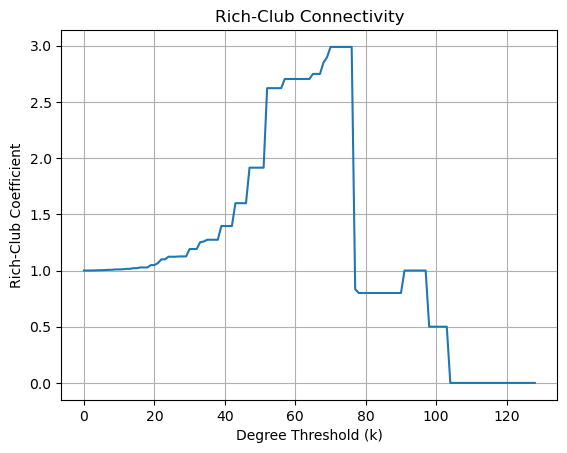

In [51]:
rich_club = nx.rich_club_coefficient(likes, normalized=True)

import matplotlib.pyplot as plt
plt.plot(list(rich_club.keys()), list(rich_club.values()))
plt.xlabel('Degree Threshold (k)')
plt.ylabel('Rich-Club Coefficient')
plt.title('Rich-Club Connectivity')
plt.grid(True)
plt.show()


### Hashtag coocurrence

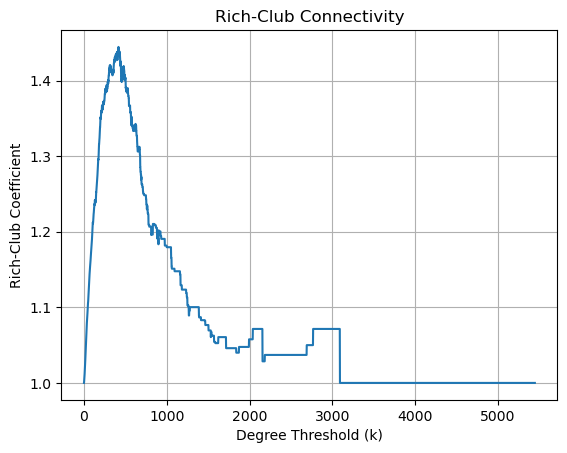

In [52]:
rich_club = nx.rich_club_coefficient(hc, normalized=True)

import matplotlib.pyplot as plt
plt.plot(list(rich_club.keys()), list(rich_club.values()))
plt.xlabel('Degree Threshold (k)')
plt.ylabel('Rich-Club Coefficient')
plt.title('Rich-Club Connectivity')
plt.grid(True)
plt.show()


### Duet/Stitch

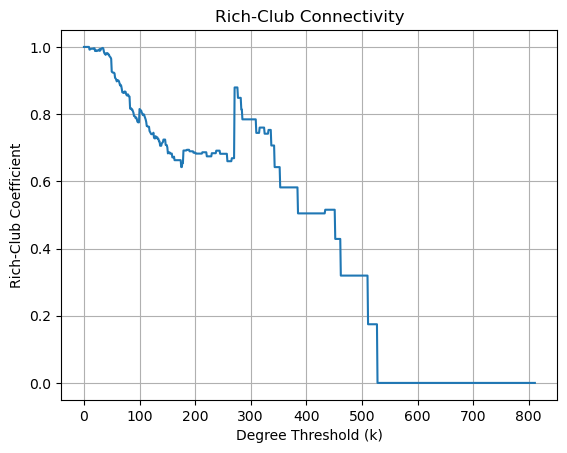

In [57]:
ds_undirected = ds.to_undirected()
ds_undirected.remove_edges_from(nx.selfloop_edges(ds_undirected))
rich_club = nx.rich_club_coefficient(ds_undirected, normalized=True)

import matplotlib.pyplot as plt
plt.plot(list(rich_club.keys()), list(rich_club.values()))
plt.xlabel('Degree Threshold (k)')
plt.ylabel('Rich-Club Coefficient')
plt.title('Rich-Club Connectivity')
plt.grid(True)
plt.show()


### Follows

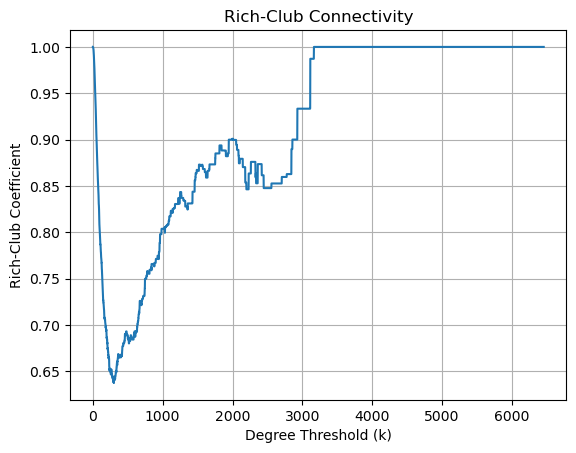

In [58]:
follows_undirected = follows.to_undirected()
follows_undirected.remove_edges_from(nx.selfloop_edges(follows_undirected))
rich_club = nx.rich_club_coefficient(follows_undirected, normalized=True)

import matplotlib.pyplot as plt
plt.plot(list(rich_club.keys()), list(rich_club.values()))
plt.xlabel('Degree Threshold (k)')
plt.ylabel('Rich-Club Coefficient')
plt.title('Rich-Club Connectivity')
plt.grid(True)
plt.show()


# Is there an overlap between communities?

In [275]:
def select_top_communities(partition, ig_graph, coverage_threshold=0.8):
    """
    Selects the largest communities covering at least `coverage_threshold` proportion of nodes.

    Args:
        partition (VertexClustering): Result of leidenalg.find_partition
        ig_graph (igraph.Graph): The original igraph graph
        coverage_threshold (float): Desired coverage (default is 0.8 for 80%)

    Returns:
        selected_communities (list of tuples): [(comm_id, [members]), ...]
        coverage_info (dict): {'covered_nodes': int, 'total_nodes': int, 'percentage': float}
    """
    from collections import defaultdict

    total_nodes = ig_graph.vcount()
    target_coverage = coverage_threshold * total_nodes

    comm_dict = defaultdict(list)
    for idx, comm_id in enumerate(partition.membership):
        node_name = ig_graph.vs[idx]['name']
        comm_dict[comm_id].append(node_name)

    sorted_comms = sorted(comm_dict.items(), key=lambda x: len(x[1]), reverse=True)

    selected_communities = []
    covered_nodes = 0
    for comm_id, members in sorted_comms:
        selected_communities.append((comm_id, members))
        covered_nodes += len(members)
        if covered_nodes >= target_coverage:
            break

    return selected_communities


In [276]:
partitions = {
    'hc': hc_partition,
    'follows': follows_partition,
    'ds': ds_partition,
    'likes': likes_partition,
}

igraphs = {
    'follows': follows_igraph,
    'hc': hc_igraph,
    'ds': ds_igraph,
    'likes': likes_igraph,
}

In [277]:
#selected_comms are already sorted
selected_comms = {}
for network in partitions.keys():
    selected_comms[network] = select_top_communities(partitions[network], igraphs[network], coverage_threshold=0.8)
    print(f"For {network} network there are {len(selected_comms[network])} selected communities")

For hc network there are 16 selected communities
For follows network there are 5 selected communities
For ds network there are 10 selected communities
For likes network there are 7 selected communities


/var/folders/x2/b14143294ts62_p97djvvyh00000gn/T/ipykernel_1272/899563705.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


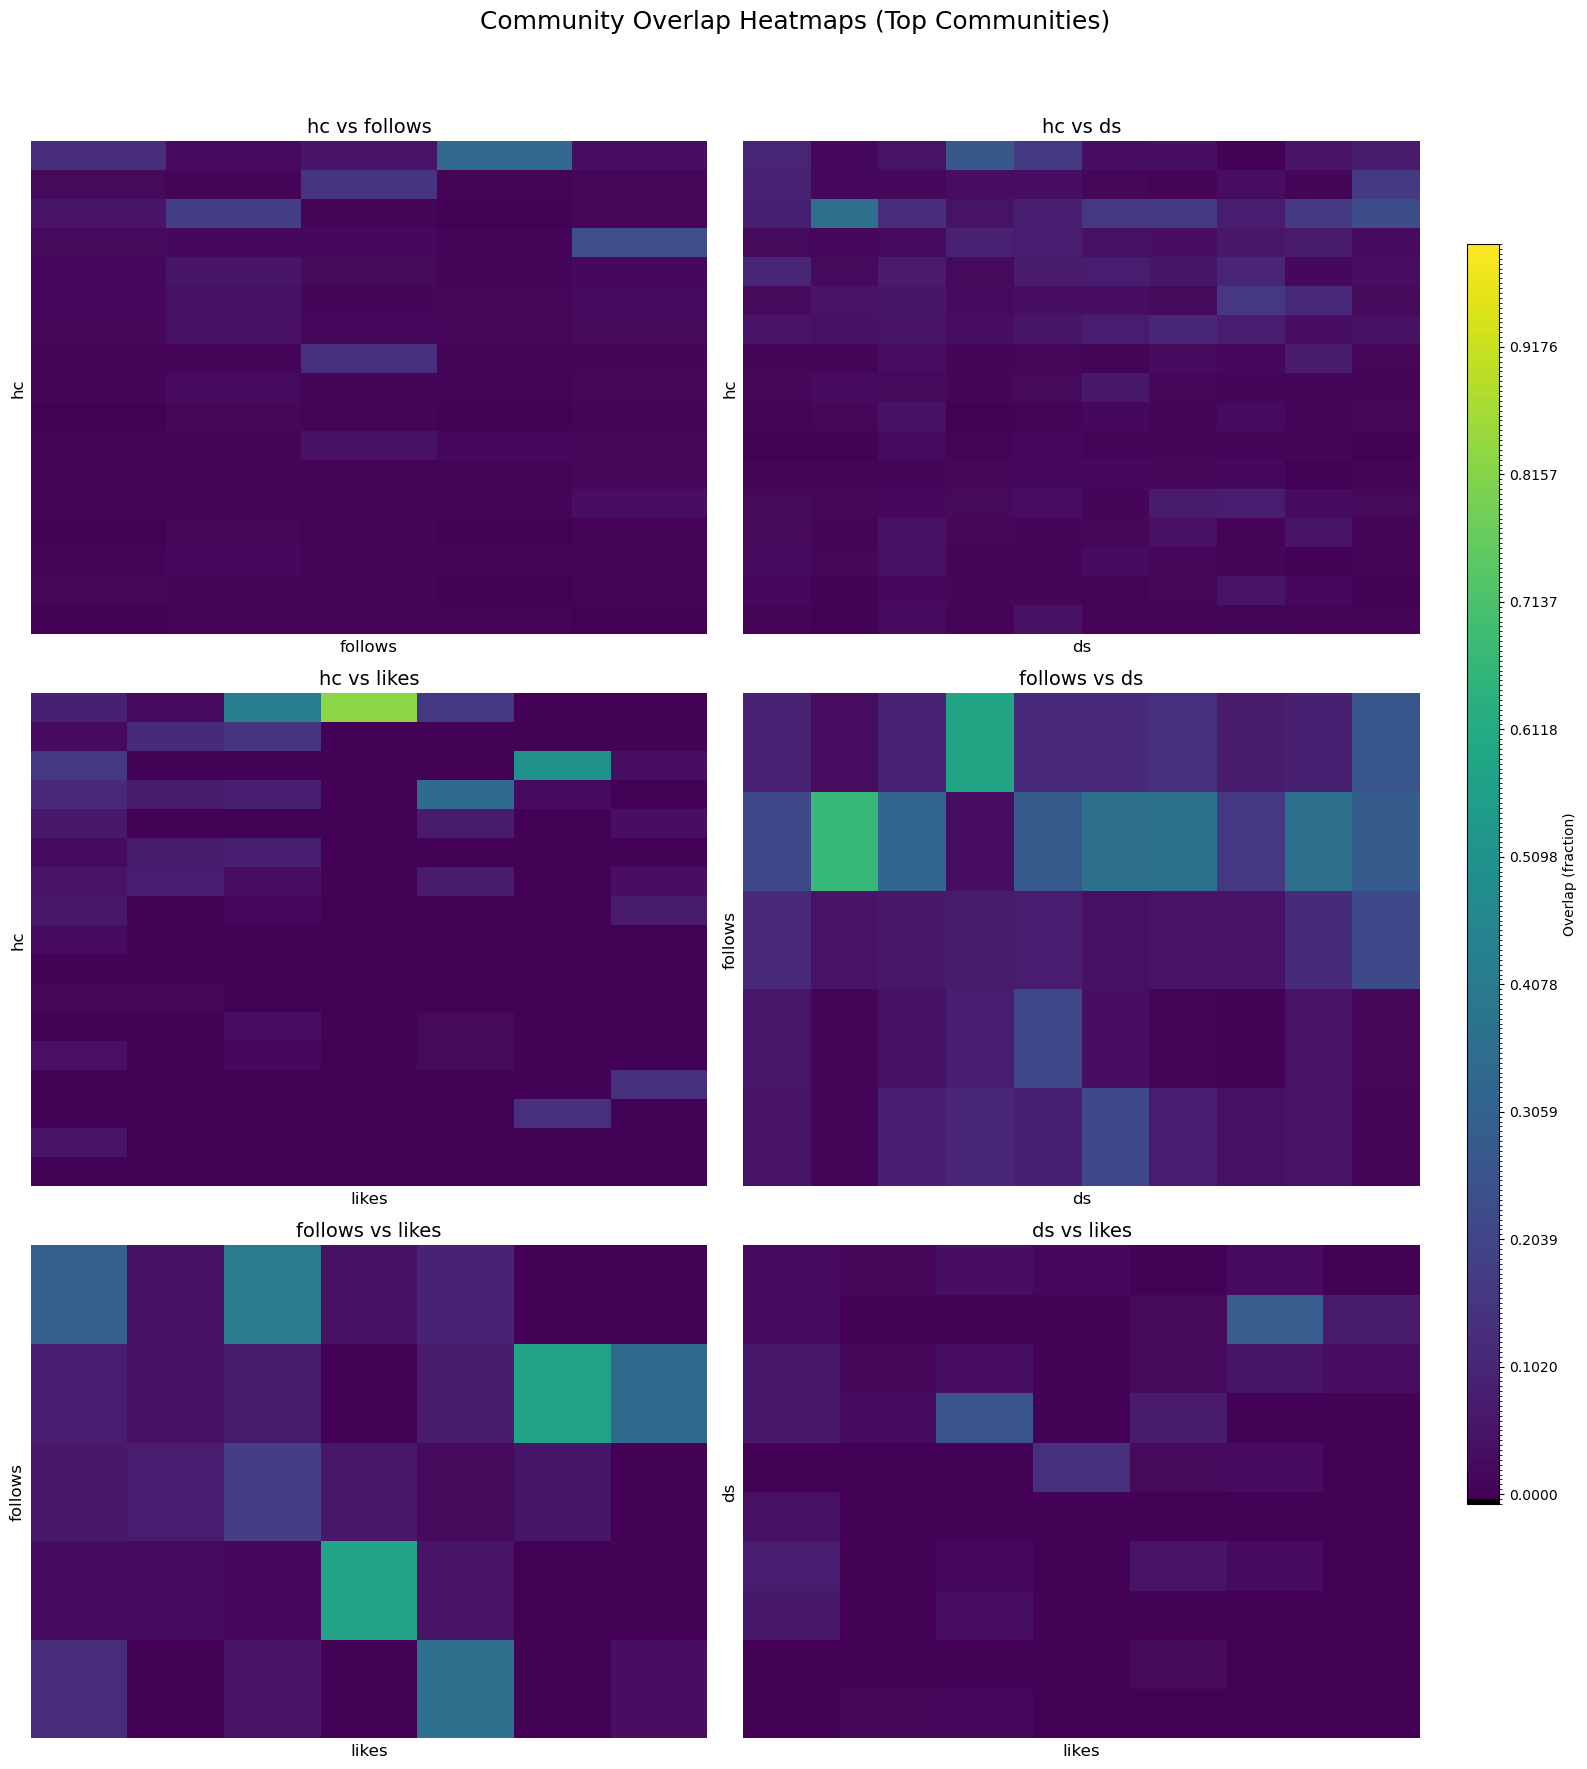

In [265]:
community_sets = {
    name: {i: set(members) for i, (_, members) in enumerate(comms)}
    for name, comms in selected_comms.items()
}

network_sizes = {
    'hc': hc.number_of_nodes(),
    'follows': follows.number_of_nodes(),
    'ds': ds.number_of_nodes(),
    'likes': likes.number_of_nodes(),
}

def compute_percentage_overlap_matrix(comm_a, comm_b):
    matrix = np.full((len(comm_a), len(comm_b)), -1.0)  # Use -1 to represent empty community overlap
    
    for i in range(len(comm_a)):
        nodes_a = comm_a.get(i, set())
        if not nodes_a:
            continue
        for j in range(len(comm_b)):
            nodes_b = comm_b.get(j, set())
            if not nodes_b:
                continue
            intersection = nodes_a & nodes_b
            matrix[i, j] = len(intersection) / len(nodes_a)
    
    return matrix

network_names = list(community_sets.keys())
overlap_matrices = {}

for i in range(len(network_names)):
    for j in range(i + 1, len(network_names)):
        net1, net2 = network_names[i], network_names[j]
        smaller, larger = (net1, net2) if network_sizes[net1] <= network_sizes[net2] else (net2, net1)
        matrix = compute_percentage_overlap_matrix(community_sets[smaller], community_sets[larger])
        overlap_matrices[(smaller, larger)] = matrix

def get_overlap_matrix_safe(overlap_matrices, net_a, net_b):
    key = (net_a, net_b)
    reverse_key = (net_b, net_a)
    if key in overlap_matrices:
        return overlap_matrices[key], net_a, net_b
    elif reverse_key in overlap_matrices:
        return overlap_matrices[reverse_key].T, net_a, net_b
    else:
        raise KeyError(f"No overlap matrix found for networks: {net_a} and {net_b}")

viridis = sns.color_palette("viridis", as_cmap=True)
colors = ["black"] + [viridis(x) for x in np.linspace(0, 1, 256)]
cmap = ListedColormap(colors)
bounds = [-1.1, -0.00001] + list(np.linspace(0, 1, 256))
norm = BoundaryNorm(bounds, cmap.N)

def plot_overlap_matrix_safe(overlap_matrices, net_a, net_b):
    matrix, a, b = get_overlap_matrix_safe(overlap_matrices, net_a, net_b)
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=False, cmap=cmap, norm=norm, cbar_kws={'label': 'Percentage Overlap'})
    plt.title(f"Percentage Overlap: {a} vs {b}")
    plt.xlabel(f"Communities in {b}")
    plt.ylabel(f"Communities in {a}")
    plt.tight_layout()
    plt.show()

pairs = list(combinations(network_names, 2))
n_plots = min(len(pairs), 6)
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for idx, (net_a, net_b) in enumerate(pairs[:6]):
    try:
        matrix, a, b = get_overlap_matrix_safe(overlap_matrices, net_a, net_b)
        ax = axes[idx]
        sns.heatmap(
            matrix,
            ax=ax,
            cmap=cmap,
            norm=norm,
            cbar=False,
            xticklabels=False,
            yticklabels=False
        )
        ax.set_title(f"{a} vs {b}", fontsize=14)
        ax.set_xlabel(f"{b}", fontsize=12)
        ax.set_ylabel(f"{a}", fontsize=12)
    except KeyError:
        print(f"No matrix found for: {net_a}, {net_b}")
        axes[idx].axis("off")

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label="Overlap (fraction)")

fig.suptitle("Community Overlap Heatmaps (Top Communities)", fontsize=18)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


In [257]:
max_overlap = -1
max_info = None

for (net_a, net_b), matrix in overlap_matrices.items():
    valid_mask = matrix >= 0
    if not np.any(valid_mask):
        continue
    local_max = np.max(matrix[valid_mask])
    if local_max > max_overlap:
        max_overlap = local_max
        masked_matrix = np.where(valid_mask, matrix, -np.inf)
        i, j = np.unravel_index(np.argmax(masked_matrix), matrix.shape)
        max_info = (net_a, net_b, i, j)

if max_info:
    net1, net2, comm1, comm2 = max_info
    print(f"Highest community overlap: {max_overlap:.3f} ({max_overlap * 100:.2f}%)")
    print(f"Between community {comm1} in '{net1}' and community {comm2} in '{net2}'")
else:
    print("No valid overlaps found.")


Highest community overlap: 0.827 (82.69%)
Between community 3 in 'likes' and community 0 in 'hc'


In [258]:
average_overlaps = {}

for (net_a, net_b), matrix in overlap_matrices.items():
    valid_values = matrix[matrix >= 0]  # Filter out -1 values
    if valid_values.size > 0:
        avg_overlap = np.mean(valid_values)
        average_overlaps[(net_a, net_b)] = avg_overlap
    else:
        average_overlaps[(net_a, net_b)] = None

# Display results
print("\nAverage Percentage Overlap for Each Network Pair:")
for (a, b), avg in average_overlaps.items():
    if avg is not None:
        print(f"{a} vs {b}: {avg:.4f} ({avg * 100:.2f}%)")
    else:
        print(f"{a} vs {b}: No valid overlaps.")



Average Percentage Overlap for Each Network Pair:
follows vs hc: 0.0258 (2.58%)
ds vs follows: 0.1329 (13.29%)
likes vs follows: 0.1065 (10.65%)
ds vs hc: 0.0374 (3.74%)
likes vs hc: 0.0364 (3.64%)
likes vs ds: 0.0238 (2.38%)


/var/folders/x2/b14143294ts62_p97djvvyh00000gn/T/ipykernel_1272/1068148194.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


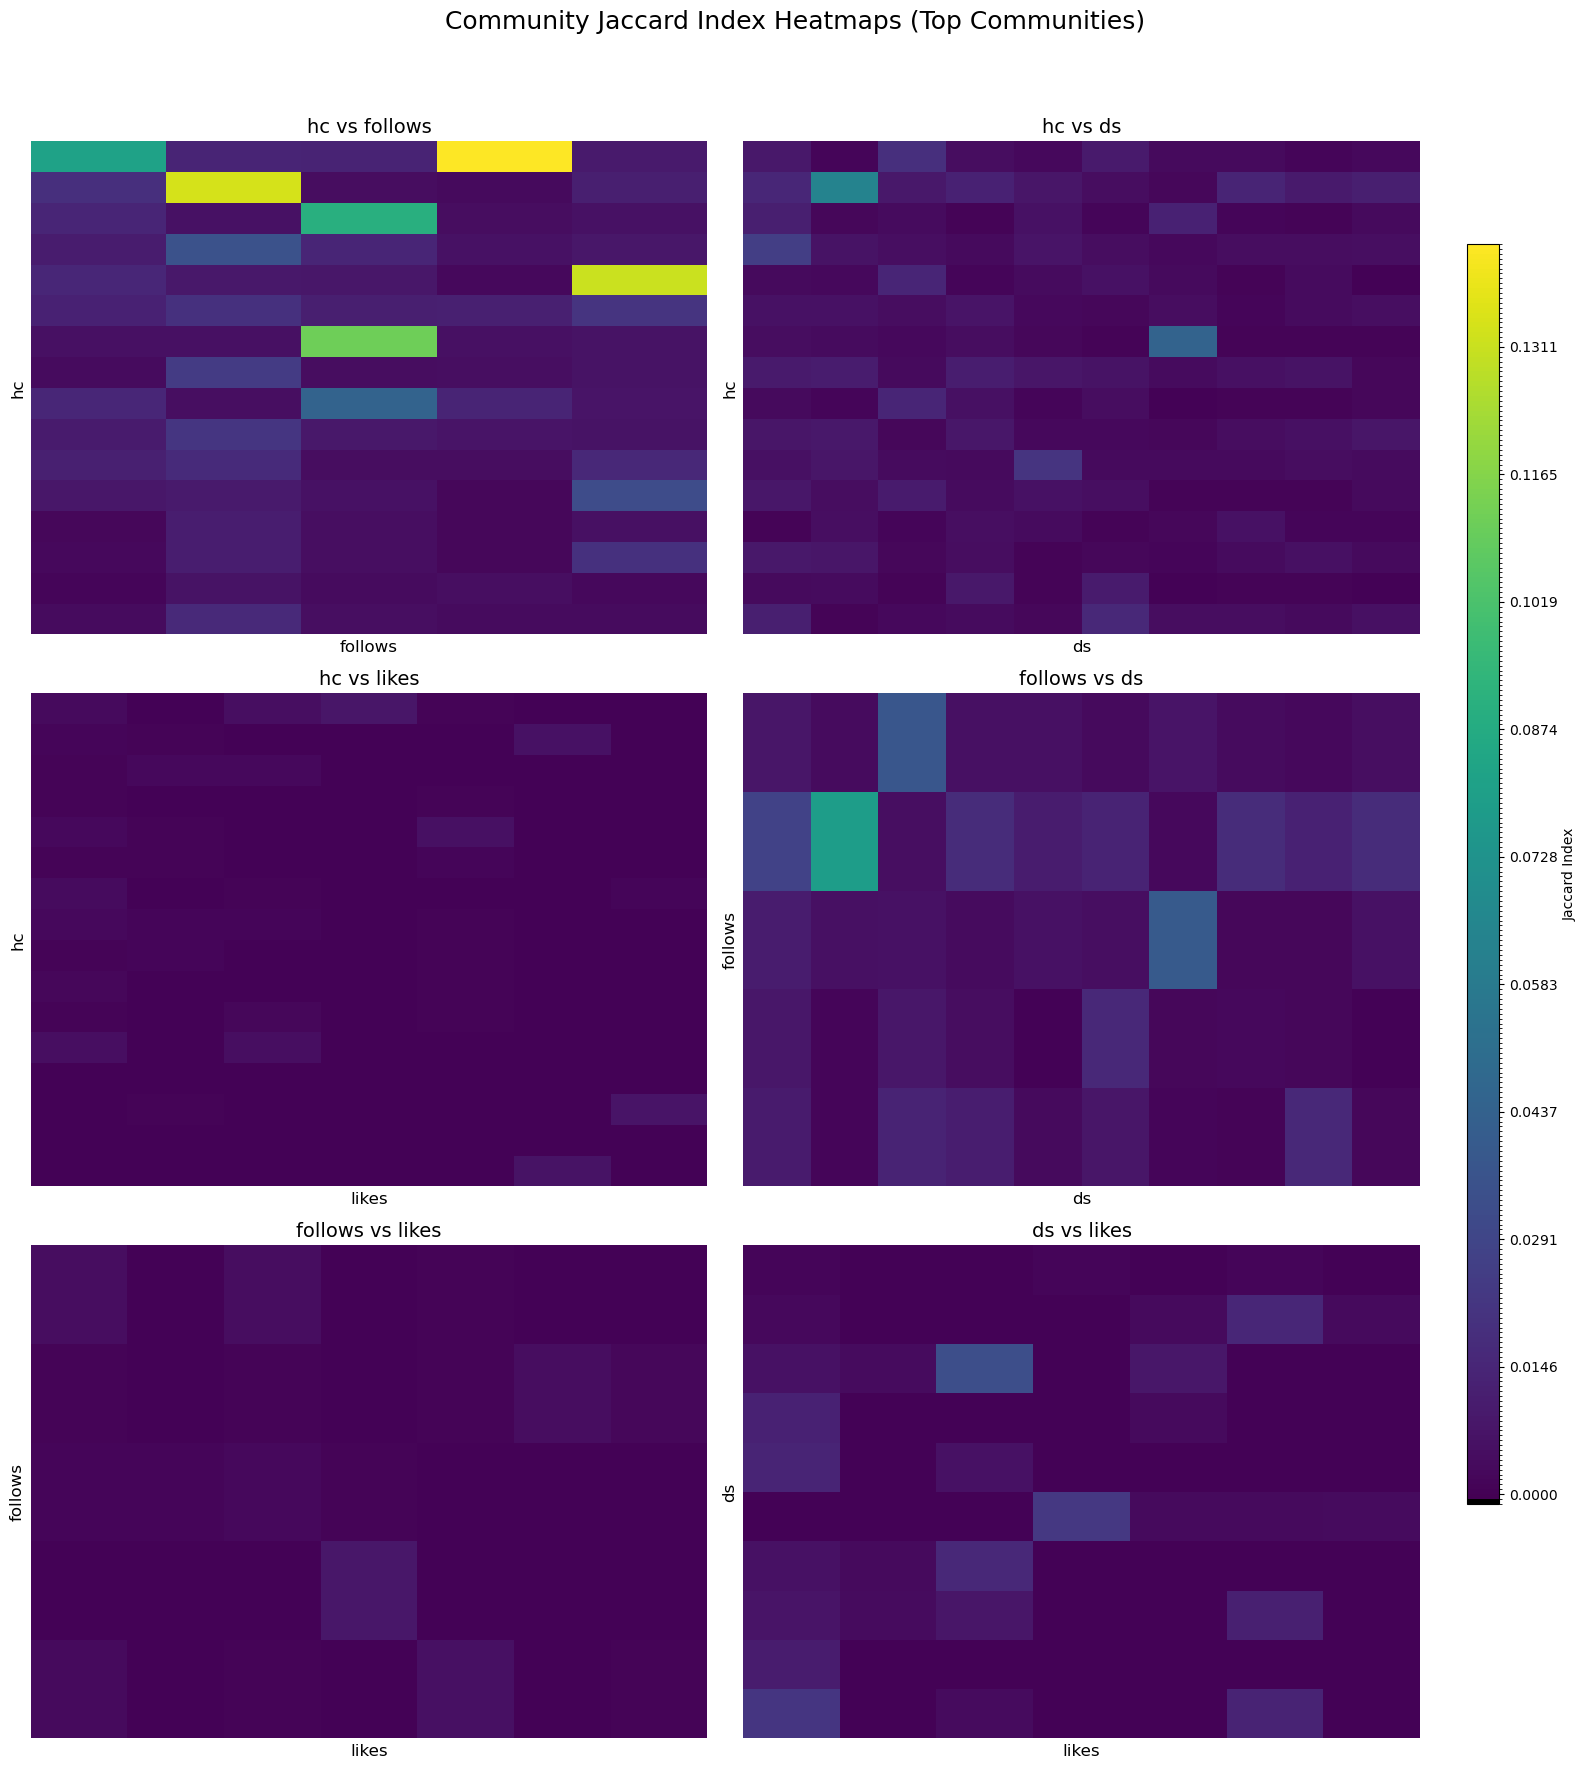

In [278]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
from itertools import combinations

# --- Prepare community_sets and network_sizes (your existing inputs assumed) ---

community_sets = {
    name: {i: set(members) for i, (_, members) in enumerate(comms)}
    for name, comms in selected_comms.items()
}

network_sizes = {
    'follows': follows.number_of_nodes(),
    'hc': hc.number_of_nodes(),
    'ds': ds.number_of_nodes(),
    'likes': likes.number_of_nodes(),
}

# --- Jaccard Index Computation ---

def compute_jaccard_index_matrix(comm_a, comm_b):
    matrix = np.full((len(comm_a), len(comm_b)), -1.0)  # -1 = no overlap
    for i in range(len(comm_a)):
        nodes_a = comm_a.get(i, set())
        if not nodes_a:
            continue
        for j in range(len(comm_b)):
            nodes_b = comm_b.get(j, set())
            if not nodes_b:
                continue
            intersection = nodes_a & nodes_b
            union = nodes_a | nodes_b
            jaccard_index = len(intersection) / len(union) if len(union) > 0 else 0
            matrix[i, j] = jaccard_index
    return matrix

# --- Compute Jaccard Matrices ---

network_names = list(community_sets.keys())
jaccard_matrices = {}

for i in range(len(network_names)):
    for j in range(i + 1, len(network_names)):
        net1, net2 = network_names[i], network_names[j]
        smaller, larger = (net1, net2) if network_sizes[net1] <= network_sizes[net2] else (net2, net1)
        matrix = compute_jaccard_index_matrix(community_sets[smaller], community_sets[larger])
        jaccard_matrices[(smaller, larger)] = matrix

# --- Safe Matrix Access Function ---

def get_jaccard_matrix_safe(jaccard_matrices, net_a, net_b):
    key = (net_a, net_b)
    reverse_key = (net_b, net_a)
    if key in jaccard_matrices:
        return jaccard_matrices[key], net_a, net_b
    elif reverse_key in jaccard_matrices:
        return jaccard_matrices[reverse_key].T, net_a, net_b
    else:
        raise KeyError(f"No Jaccard matrix found for networks: {net_a} and {net_b}")

# --- Color Setup Based on Maximum Jaccard Value ---

# Compute the actual maximum value across all matrices (excluding -1)
max_jaccard_value = max(
    matrix[matrix >= 0].max()
    for matrix in jaccard_matrices.values()
    if np.any(matrix >= 0)
)

viridis = sns.color_palette("viridis", as_cmap=True)
colors = ["black"] + [viridis(x) for x in np.linspace(0, 1, 256)]
cmap = ListedColormap(colors)
bounds = [-1.1, -0.00001] + list(np.linspace(0, max_jaccard_value, 256))
norm = BoundaryNorm(bounds, cmap.N)

# --- Plotting Function ---

def plot_jaccard_matrix_safe(jaccard_matrices, net_a, net_b):
    matrix, a, b = get_jaccard_matrix_safe(jaccard_matrices, net_a, net_b)
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=False, cmap=cmap, norm=norm, cbar_kws={'label': 'Jaccard Index'})
    plt.title(f"Jaccard Index: {a} vs {b}")
    plt.xlabel(f"Communities in {b}")
    plt.ylabel(f"Communities in {a}")
    plt.tight_layout()
    plt.show()

# --- Plot up to 6 heatmaps in a grid ---

pairs = list(combinations(network_names, 2))
n_plots = min(len(pairs), 6)
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for idx, (net_a, net_b) in enumerate(pairs[:6]):
    try:
        matrix, a, b = get_jaccard_matrix_safe(jaccard_matrices, net_a, net_b)
        ax = axes[idx]
        sns.heatmap(
            matrix,
            ax=ax,
            cmap=cmap,
            norm=norm,
            cbar=False,
            xticklabels=False,
            yticklabels=False
        )
        ax.set_title(f"{a} vs {b}", fontsize=14)
        ax.set_xlabel(f"{b}", fontsize=12)
        ax.set_ylabel(f"{a}", fontsize=12)
    except KeyError:
        print(f"No matrix found for: {net_a}, {net_b}")
        axes[idx].axis("off")

# --- Colorbar and Layout ---

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label="Jaccard Index")

fig.suptitle("Community Jaccard Index Heatmaps (Top Communities)", fontsize=18)
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


In [294]:
matrix, net_a, net_b = get_jaccard_matrix_safe(jaccard_matrices, 'hc', 'likes')

if net_a == 'hc':
    jaccard_value = matrix[0, 3] 
else:
    jaccard_value = matrix[3, 0] 

print(f"Jaccard Index between community 0 in 'hc' and community 3 in 'likes': {jaccard_value:.4f}")


Jaccard Index between community 0 in 'hc' and community 3 in 'likes': 0.0073


In [279]:
max_jaccard_value

0.14283983523140295

In [285]:
network_nodes = {
    'follows': set(follows.nodes()),
    'hc': set(hc.nodes()),
    'ds': set(ds.nodes()),
    'likes': set(likes.nodes()),
}

print("Node Overlap:\n")
for net_a, net_b in combinations(network_nodes.keys(), 2):
    nodes_a = network_nodes[net_a]
    nodes_b = network_nodes[net_b]
    
    intersection = nodes_a & nodes_b
    union = nodes_a | nodes_b
    smaller_net, smaller_nodes = (net_a, nodes_a) if len(nodes_a) <= len(nodes_b) else (net_b, nodes_b)
    
    overlap_percent = (len(intersection) / len(union)) *100

    print(f"{net_a} vs {net_b}")
    print(f"  - Shared nodes: {len(intersection)}")
    print(f"  - Overlap: {overlap_percent:.2f}%\n")


Node Overlap:

follows vs hc
  - Shared nodes: 12884
  - Overlap: 24.23%

follows vs ds
  - Shared nodes: 3287
  - Overlap: 12.15%

follows vs likes
  - Shared nodes: 271
  - Overlap: 1.03%

hc vs ds
  - Shared nodes: 3057
  - Overlap: 7.45%

hc vs likes
  - Shared nodes: 327
  - Overlap: 0.82%

ds vs likes
  - Shared nodes: 146
  - Overlap: 3.22%



In [286]:
def get_undirected_edges(G):
    return set(frozenset((u, v)) for u, v in G.edges())

edge_sets = {
    'follows': get_undirected_edges(follows),
    'hc': get_undirected_edges(hc),
    'ds': get_undirected_edges(ds),
    'likes': get_undirected_edges(likes),
}

print("Edge Overlap Between Networks:\n")
for net_a, net_b in combinations(edge_sets.keys(), 2):
    edges_a = edge_sets[net_a]
    edges_b = edge_sets[net_b]

    intersection = edges_a & edges_b
    union = edges_a | edges_b
    smaller_net = net_a if len(edges_a) <= len(edges_b) else net_b
    smaller_size = min(len(edges_a), len(edges_b))
    overlap_percent = (len(intersection) / len(union)) *100

    print(f"{net_a} vs {net_b}")
    print(f"  - Shared edges: {len(intersection)}")
    print(f"  - Overlap: {overlap_percent:.2f}%\n")


Edge Overlap Between Networks:

follows vs hc
  - Shared edges: 28743
  - Overlap: 4.06%

follows vs ds
  - Shared edges: 8972
  - Overlap: 2.60%

follows vs likes
  - Shared edges: 841
  - Overlap: 0.27%

hc vs ds
  - Shared edges: 3750
  - Overlap: 0.77%

hc vs likes
  - Shared edges: 1558
  - Overlap: 0.35%

ds vs likes
  - Shared edges: 140
  - Overlap: 0.22%

